In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#### Data Exploration and Preprocessing

In [3]:
shill_bidding_data = pd.read_csv('/Users/eupirate/Desktop/CCT/CA1 ML 五月/Shill Bidding Dataset.csv')
shill_bidding_data.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [4]:
missing_values = shill_bidding_data.isnull().sum()
missing_values

Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

In [5]:
### There is no missing data in shill_bidding_data.csv. THis will make our data processing simple.
### Next we can go ahead to detech and handling outliers. We will identify outliers in the numerical columns only by using box plots.

/Users/eupirate/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/eupirate/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/eupirate/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/eupirate/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


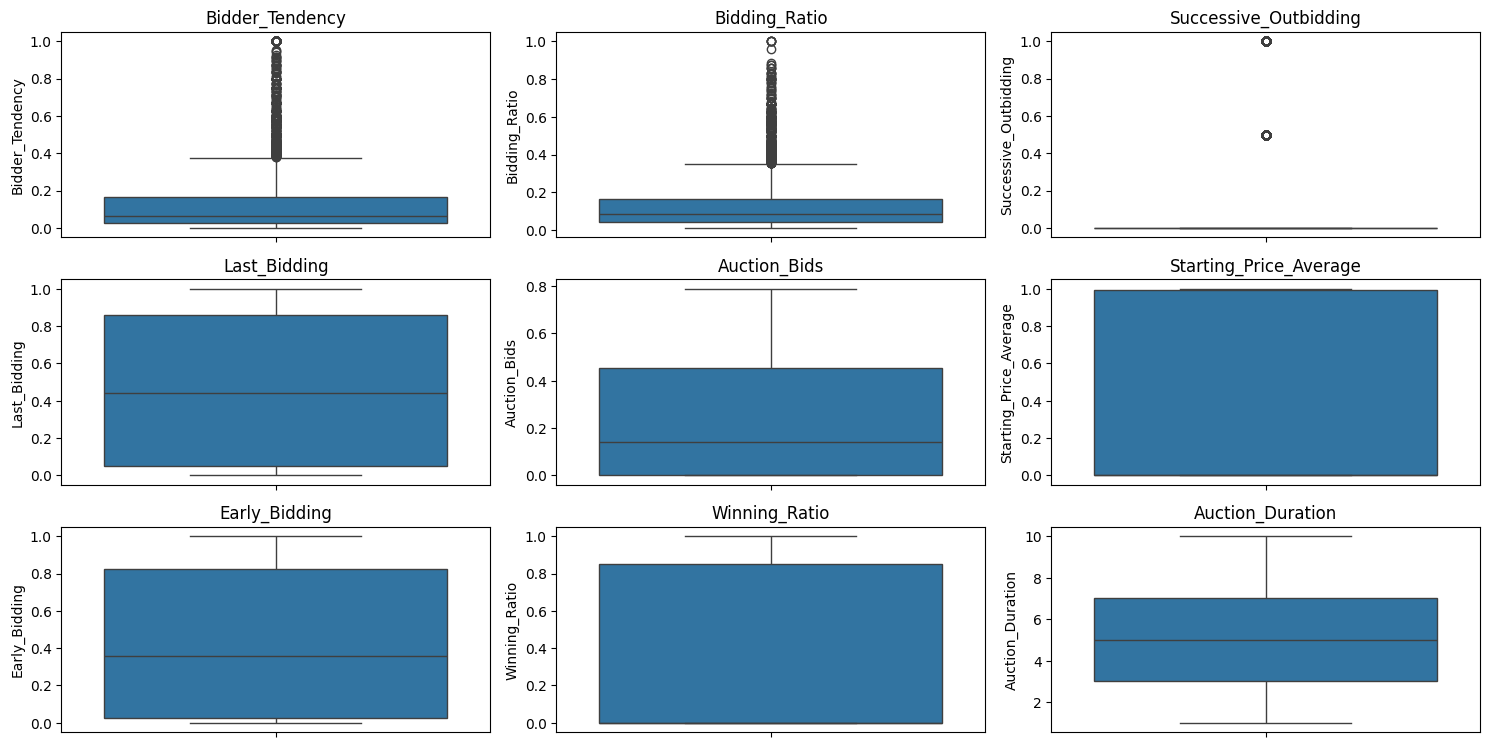

          Record_ID   Auction_ID  Bidder_Tendency  Bidding_Ratio  \
count   6321.000000  6321.000000      6321.000000    6321.000000   
mean    7535.829457  1241.388230         0.142541       0.127670   
std     4364.759137   735.770789         0.197084       0.131530   
min        1.000000     5.000000         0.000000       0.011765   
25%     3778.000000   589.000000         0.027027       0.043478   
50%     7591.000000  1246.000000         0.062500       0.083333   
75%    11277.000000  1867.000000         0.166667       0.166667   
max    15144.000000  2538.000000         1.000000       1.000000   

       Successive_Outbidding  Last_Bidding  Auction_Bids  \
count            6321.000000   6321.000000   6321.000000   
mean                0.103781      0.463119      0.231606   
std                 0.279698      0.380097      0.255252   
min                 0.000000      0.000000      0.000000   
25%                 0.000000      0.047928      0.000000   
50%                 0.00000

In [6]:
### describe statistical summary
stat_summary = shill_bidding_data.describe()

### exclude Record_ID, Auction_ID, Bidder_ID, Class
numerical_columns = shill_bidding_data.columns[3:-1] 

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=shill_bidding_data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

## print statistical summary
print(stat_summary)

In [7]:
### we can see the potential outliers in Bidder_Tendency, Bidding_Ratio and Successive_Outbidding columns. Particulary those with high standard deviations and with a large range between min and max values.
### with those detected outliers. can can cap those outliers by applying the interquartile range method (IQR), we can create Q1 with quantile(0.25), Q3 with quantile(0.75). We use Q3 - Q1 to work out the IQR. With that we'll calculate the IQR for each column and cap the outliers to 1.5*IQR range.

In [8]:
### create a function to cap outliers using the IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return df

### apply the function to all numerical columns
for column in numerical_columns:
    shill_bidding_data = cap_outliers(shill_bidding_data, column)

### and then normalize numerical data fbetween 0 and 1 or better comparison.
### normalize numerical columns
normalized_data = shill_bidding_data.copy()
for column in numerical_columns:
    normalized_data[column] = (shill_bidding_data[column] - shill_bidding_data[column].min()) / (shill_bidding_data[column].max() - shill_bidding_data[column].min())

### display the normalized data to verify
normalized_data.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.531737,1.000000,NaN,0.000028,0.0,0.993657,0.000028,0.666667,0.444444,0
1,2,732,g***r,0.064846,0.554147,NaN,0.013124,0.0,0.993657,0.013124,0.944444,0.444444,0
2,3,732,t***p,0.379812,0.554147,NaN,0.003042,0.0,0.993657,0.003042,1.000000,0.444444,0
3,4,732,7***n,0.265868,0.554147,NaN,0.097487,0.0,0.993657,0.097487,1.000000,0.444444,0
4,5,900,z***z,0.136343,0.619567,NaN,0.001318,0.0,0.000000,0.001242,0.500000,0.666667,0


In [9]:
### create function to plot histogram with mean and median lines. by adding mean and median lines helps to quickly identify central tendency, skewness and variablity. 
def plot_histogram_with_mean_median(df, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=30, kde=True, color='skyblue')
    mean_value = df[column].mean()
    median_value = df[column].median()
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

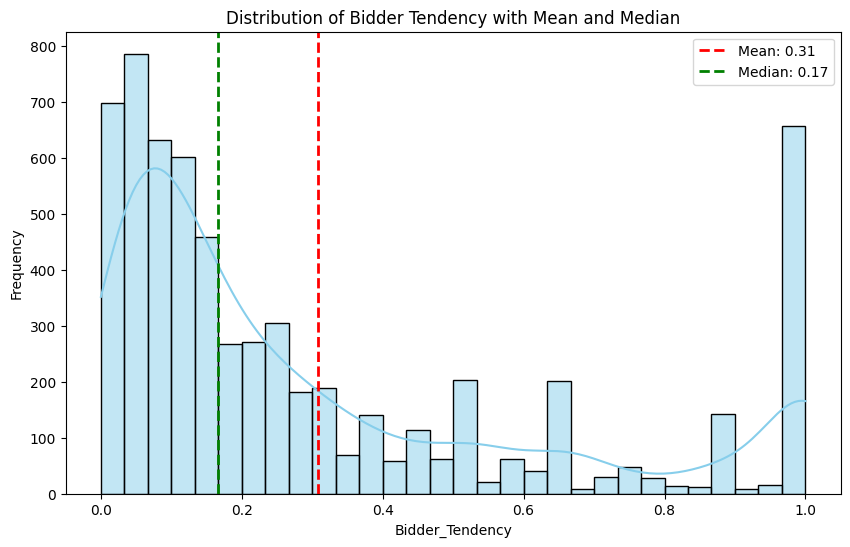

In [10]:
### plotting for Bidder Tendency
plot_histogram_with_mean_median(normalized_data, 'Bidder_Tendency', 'Distribution of Bidder Tendency with Mean and Median')

## the Distribution of Bidder Tendency shows most bidder have a lower tendency but some other bidders show higher tendencies.
## the Mean(0.31) is greater than Median(0.17), this shows a right skewed distribution. Most bidders have a low tendency to participate in auctions of a few sellers. The tail on the right shows a smaller number of bidders have high tendencies and worth additional investigation. 

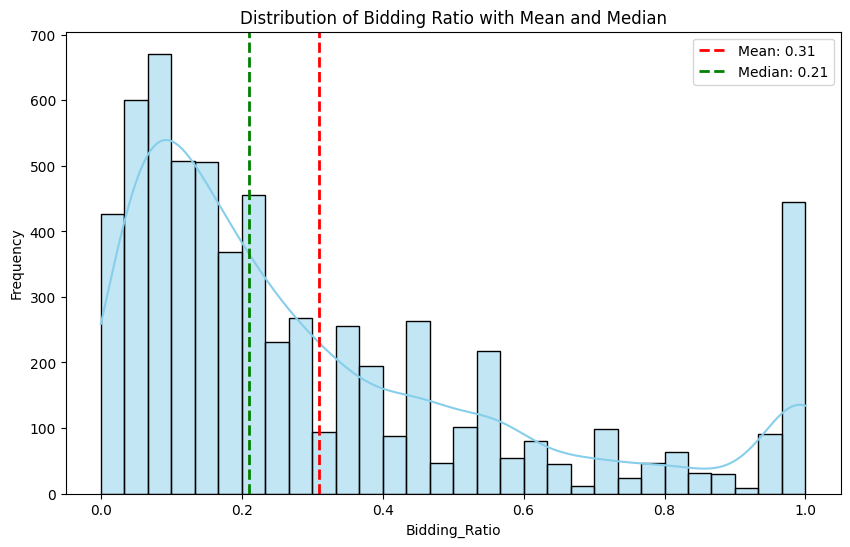

In [11]:
### plotting for Bidding Ratio
plot_histogram_with_mean_median(normalized_data, 'Bidding_Ratio', 'Distribution of Bidding Ratio with Mean and Median')

## this Distribution of Bidding Ratio shows a significant concentration of lower ratios, and with a smaller proportion of higher ratios. While most bidders have a lower frequency of bidding to raise the auction prices, there ae some bidders whom frequently participate with manipulate prices.
## tthe Mean(0.31) is greater than Median(0.21), this also shows a right skewed distribution. Most bidders have low bidding ratio, which indicate they don't frequently bid to raise auction prices. However they're some significant high bidding ratio that worth additional investigation. 

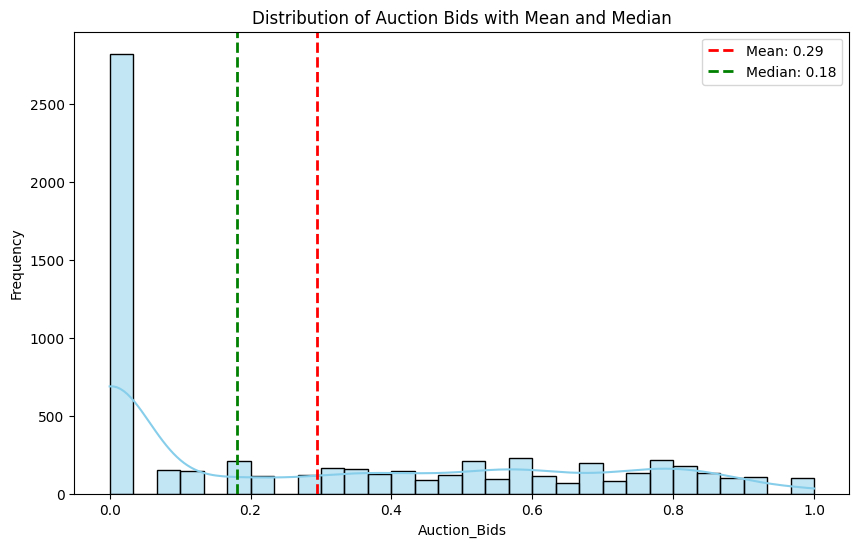

In [12]:
### plotting for Auction Bids
plot_histogram_with_mean_median(normalized_data, 'Auction_Bids', 'Distribution of Auction Bids with Mean and Median')

## the Distribution of Action Bids shows most auctions have a lower number of bids, but those with shill bidding activities tend to have a significant higher number of bids as shown in this visualization.

## the Mean(0.29) is greater than Median(0.18), this also again shows a right skewed distribution. Most auctions have a lower number of bids, this distribution shows a long right tail with some auction having significantly higher number of bids. The excessive bidding is worth additional investigation. 

In [13]:
#### with above exploring and we can clearly see all three distribution are all skewed towards to the right, indicating most data points are clustered around lower values, there are significant outliers on the higher end. The skewness is common in this dataset indicate suspicious of fraudulent activities where a minority of instances show extreme bidding activities. The higher values in the bidder tendency, bidding ratio and auction bids can be potential red flags for shill bidding.

In [14]:
#### clustering and classification

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
shill_bidding_data = pd.read_csv('/Users/eupirate/Desktop/CCT/CA1 ML 五月/Shill Bidding Dataset.csv')
shill_bidding_data.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [17]:
### encoding the target variable 'Class'
shill_bidding_data['Class'] = shill_bidding_data['Class'].astype(int)

###select features and target, drop irrelevant columns
features = shill_bidding_data.drop(columns=['Record_ID', 'Auction_ID', 'Bidder_ID', 'Class'])
target = shill_bidding_data['Class']

### normalize the features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

### split the data into training and testing sets, 30% of data will be used for testing, 70% will be used for training
### I recently learned about meaning of '42'. The number 42 is often used as a default value "The Hitchhiker's Guide to the Galaxy" by Douglas Adams. It indicates the ultimate question of life, universe and all things come to mind! :D - interestingly can be applied in Data Analytics too!! :))))
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target, test_size=0.3, random_state=42)

In [18]:
### create 2 classification models 
### 1. Logistic Regression and 2. Random Forest We first use those models to make predictions on the test data which the model has never applied before, and then calculate different metrics to show how well the models are doing in order to pick the most suitable model

In [19]:
### Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

### initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

### make predictions
y_pred_log_reg = log_reg.predict(X_test)

### evaluate the Logistic Regression model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

### print Logistic Regression metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_log_reg:.2f}")
print(f"Precision: {precision_log_reg:.2f}")
print(f"Recall: {recall_log_reg:.2f}")
print(f"F1 Score: {f1_log_reg:.2f}")
print(f"ROC-AUC: {roc_auc_log_reg:.2f}")
print("Confusion Matrix:")
print(conf_matrix_log_reg)


Logistic Regression Metrics:
Accuracy: 0.97
Precision: 0.83
Recall: 0.92
F1 Score: 0.87
ROC-AUC: 0.95
Confusion Matrix:
[[1670   37]
 [  15  175]]


In [20]:
### Random Forest

from sklearn.ensemble import RandomForestClassifier

### initialize and train the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

### make predictions
y_pred_rf = rf_clf.predict(X_test)

### evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

### print Random Forest metrics
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print(f"ROC-AUC: {roc_auc_rf:.2f}")
print("Confusion Matrix:")
print(conf_matrix_rf)


Random Forest Metrics:
Accuracy: 0.99
Precision: 0.93
Recall: 0.99
F1 Score: 0.96
ROC-AUC: 0.99
Confusion Matrix:
[[1693   14]
 [   2  188]]


In [21]:
### let's compare the 3 models based on their metrics

metrics_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Logistic Regression': [accuracy_log_reg, precision_log_reg, recall_log_reg, f1_log_reg, roc_auc_log_reg],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf]
})

# print the Logistic Regression and Random Forest comparison
print("Model Comparison:")
print(metrics_comparison)


Model Comparison:
      Metric  Logistic Regression  Random Forest
0   Accuracy             0.972588       0.991566
1  Precision             0.825472       0.930693
2     Recall             0.921053       0.989474
3   F1-Score             0.870647       0.959184
4    ROC-AUC             0.949689       0.990636


In [22]:
### model selection
best_model = 'Logistic Regression' if roc_auc_log_reg > roc_auc_rf else 'Random Forest'
print(f'The best model is: {best_model}')


The best model is: Random Forest
